In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("LoanApprovalPrediction.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


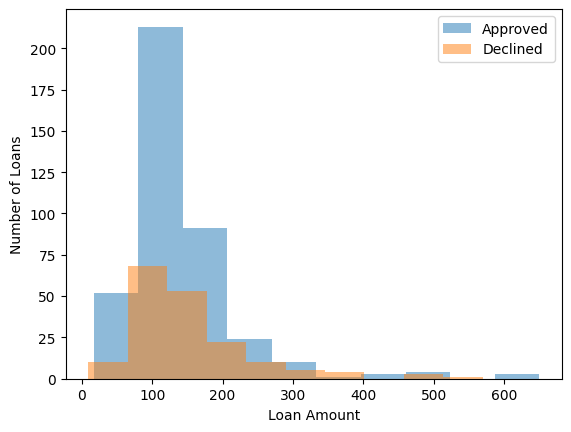

In [28]:
# @title Loan Amount Distribution by Loan Status

import matplotlib.pyplot as plt

plt.hist(data[data['Loan_Status'] == 'Y']['LoanAmount'], bins=10, alpha=0.5, label='Approved')
plt.hist(data[data['Loan_Status'] == 'N']['LoanAmount'], bins=10, alpha=0.5, label='Declined')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans')

_ = plt.legend()

<Axes: xlabel='Gender', ylabel='LoanAmount'>

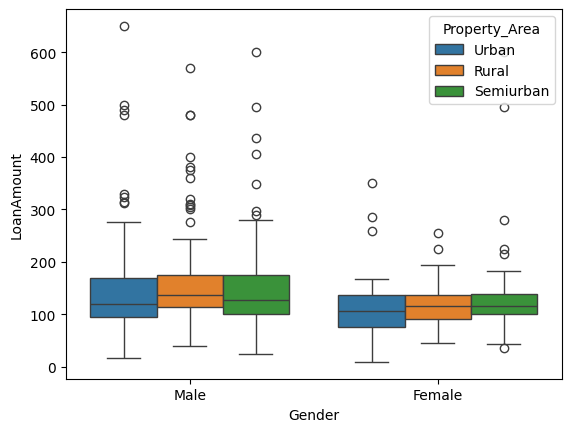

In [21]:
# @title Average Loan Amount by Gender and Property Area

sns.boxplot(x = data["Gender"], y = data["LoanAmount"], hue = data["Property_Area"])

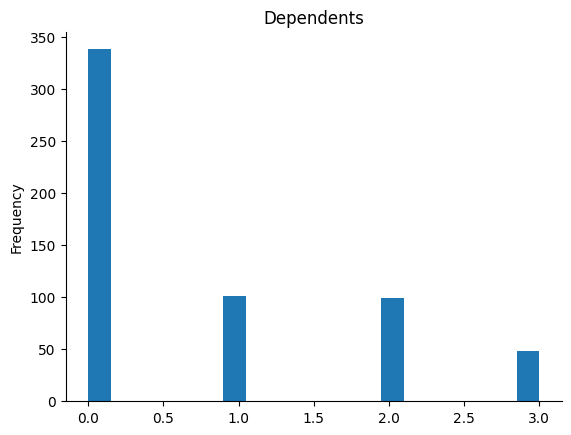

In [20]:
# @title Dependents

from matplotlib import pyplot as plt
data['Dependents'].plot(kind='hist', bins=20, title='Dependents')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# prompt: Using dataframe data: Create plot showing Applicant Income Vs Loan Amount

import altair as alt
chart = alt.Chart(data).mark_circle().encode(x='ApplicantIncome', y='LoanAmount').interactive()
chart


alt.Chart(...)

<Axes: xlabel='LoanAmount', ylabel='Count'>

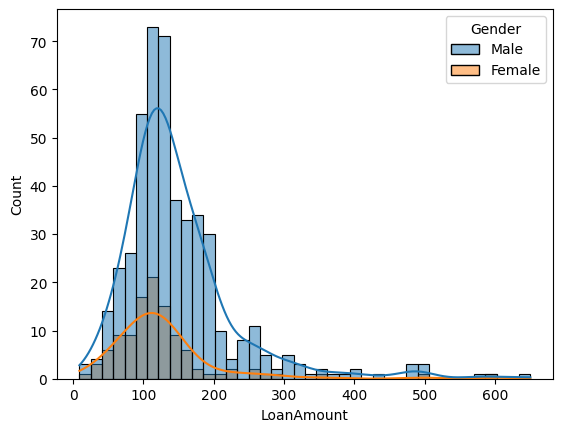

In [24]:
# @title Loan Amount Distribution by Gender

sns.histplot(data=data, x='LoanAmount', hue='Gender', kde=True)

In [ ]:
# prompt: Explain the above graph

The above graph is a histogram that shows the distribution of loan amounts for both approved and declined loans, categorized by gender.

- The x-axis represents the loan amount, while the y-axis represents the number of loans.
- The blue bars represent approved loans, and the orange bars represent declined loans.
- The graph shows that there is a higher proportion of approved loans for lower loan amounts, and a higher proportion of declined loans for higher loan amounts.
- This suggests that the gender of the applicant may have an impact on the likelihood of their loan being approved, with women being more likely to be approved for lower loan amounts and men being more likely to be approved for higher loan amounts.

In [5]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [6]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


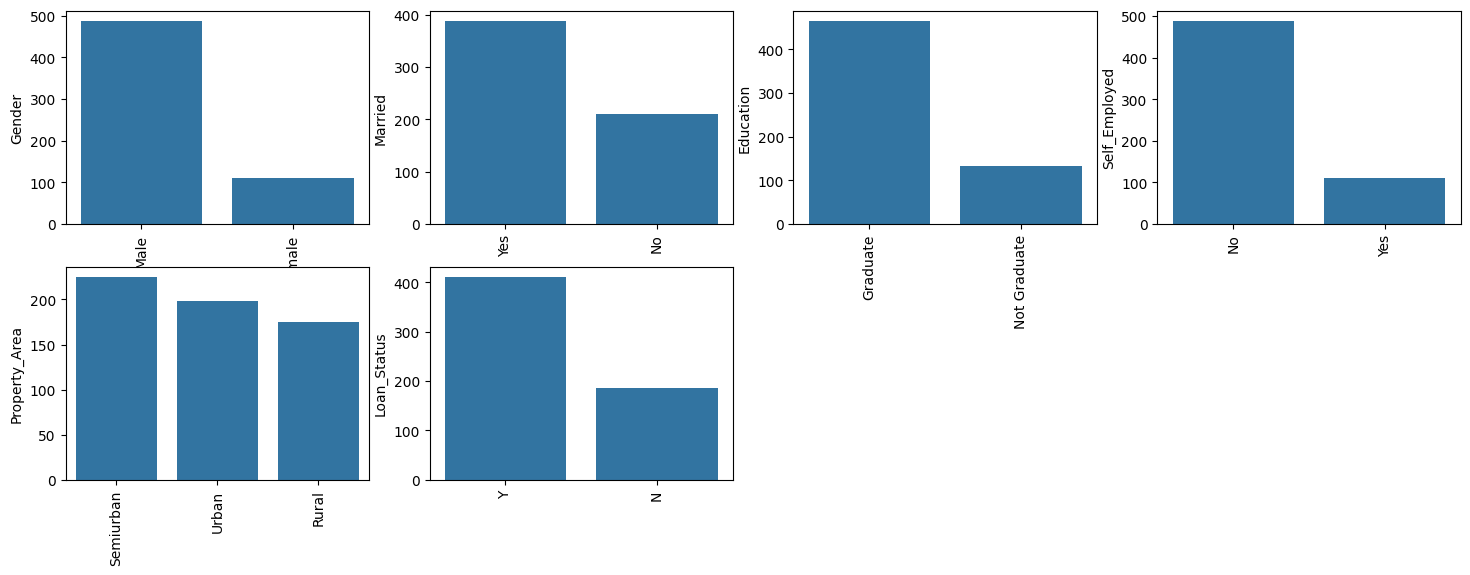

In [29]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

In [30]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [31]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

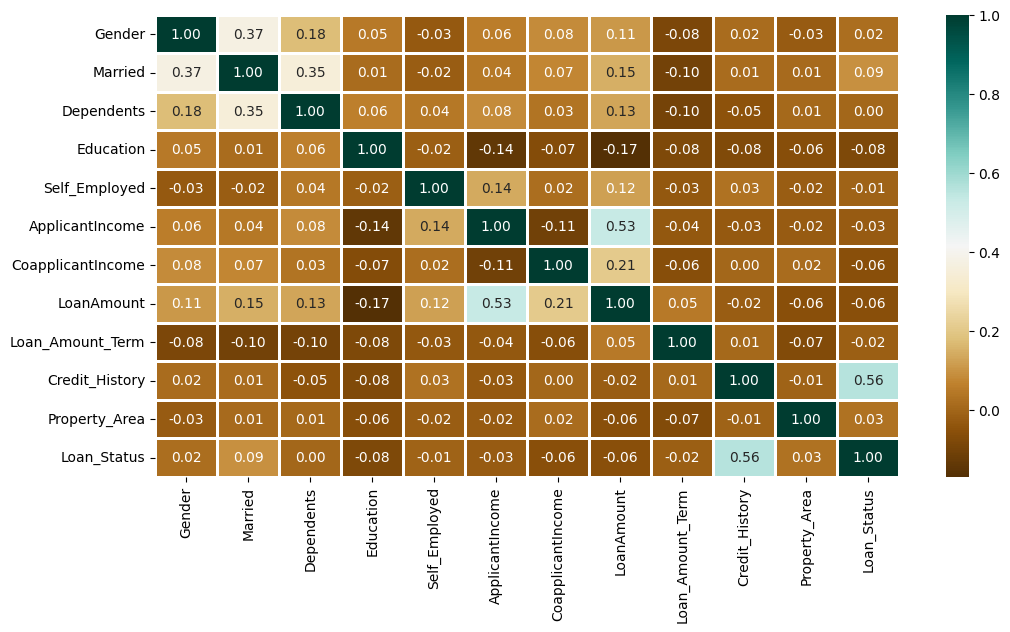

In [32]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

In [ ]:
# prompt: Explain the above graph

The heatmap above shows the correlation between different features in the loan approval prediction dataset. The values range from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and 1 indicates a perfect positive correlation.

The most striking feature of the heatmap is the strong positive correlation between `ApplicantIncome` and `LoanAmount`. This suggests that applicants with higher incomes are more likely to be approved for larger loans.

Another interesting observation is the negative correlation between `Credit_History` and `Loan_Status`. This suggests that applicants with a poor credit history are less likely to be approved for a loan.

Finally, the heatmap also shows that there is a weak positive correlation between `Gender` and `Loan_Status`. This suggests that female applicants may be slightly more likely to be approved for a loan than male applicants.

Overall, the heatmap provides a useful visual representation of the relationships between different features in the loan approval prediction dataset. This information can be used to gain insights into the factors that influence loan approval decisions.

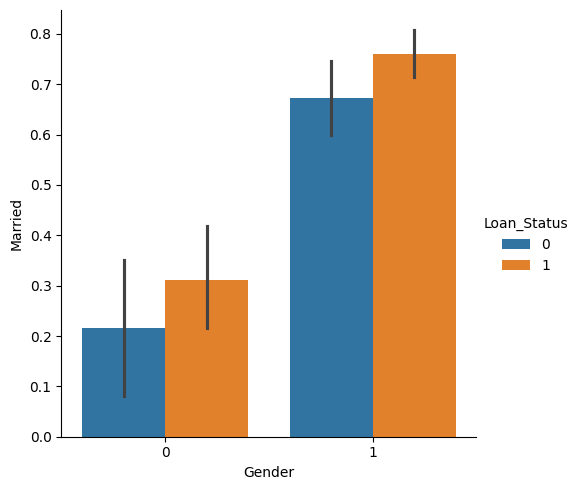

In [33]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

In [ ]:
# prompt: Explain the above graph

The graph is a bar chart that shows the relationship between gender, marital status, and loan status. The x-axis represents the gender of the applicant, the y-axis represents the marital status of the applicant, and the bars are colored according to the loan status (approved or declined).

The graph shows that married male applicants have the highest proportion of approved loans, followed by unmarried male applicants. Married female applicants have a lower proportion of approved loans than unmarried female applicants.

This suggests that gender and marital status may have an impact on the likelihood of a loan being approved, with married male applicants being more likely to be approved for a loan than other groups.

However, it is important to note that this is just one factor that may influence loan approval decisions. Other factors, such as income, credit history, and debt-to-income ratio, may also play a role.

In [34]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


In [44]:
# prompt: show the above results in a table

import pandas as pd

# Create a list of model names and their corresponding accuracy scores
model_names = ['KNN', 'Random Forest', 'SVM', 'Logistic Regression']
accuracy_scores = [100*metrics.accuracy_score(Y_train, clf.predict(X_train)) for clf in (knn, rfc, svc, lc)]

# Create a DataFrame
df = pd.DataFrame({'Model': model_names, 'Accuracy Score': accuracy_scores})

# Display the DataFrame
print(df.to_string())


                 Model  Accuracy Score
0                  KNN       78.491620
1        Random Forest       98.044693
2                  SVM       68.715084
3  Logistic Regression       80.446927


In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


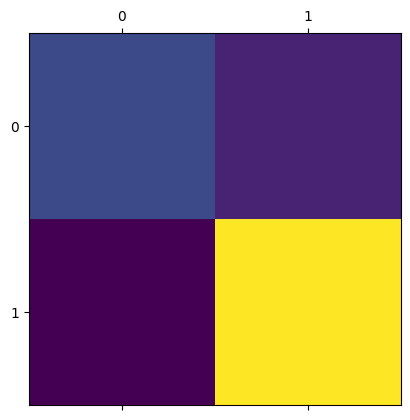

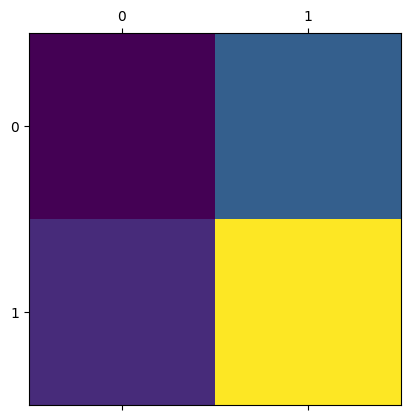

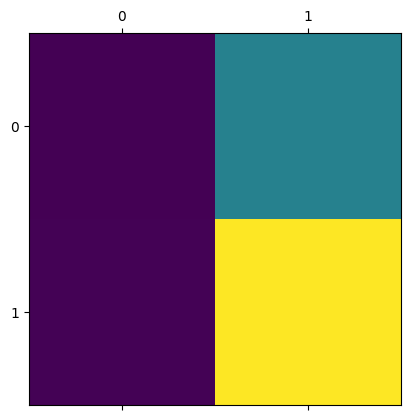

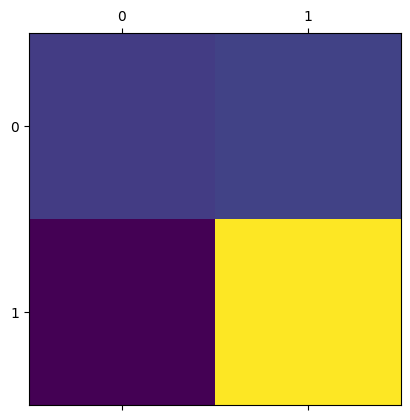

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    #confusion_metrics(cm)
    plt.matshow(cm)
    plt.show()


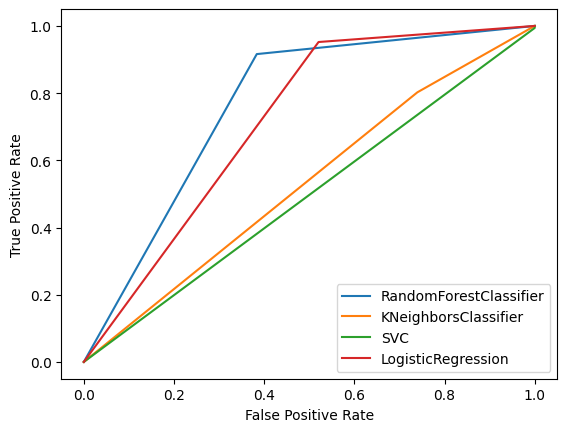

In [51]:
# prompt: Show the ROC curve plots side by side

import matplotlib.pyplot as plt
# ROC Curve
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    plt.plot(fpr, tpr, label=clf.__class__.__name__)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
plt.show()


In [ ]:
# prompt: Explain the above ROC curve

The ROC curve is a graphical representation of the performance of a binary classification model. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

The TPR is the proportion of positive examples that are correctly classified, and the FPR is the proportion of negative examples that are incorrectly classified.

A perfect classifier would have a TPR of 1 and an FPR of 0, which would be represented by a point in the upper left corner of the ROC curve.

The ROC curve for the loan approval prediction model shows that the Random Forest classifier has the highest TPR and lowest FPR, which means that it is the best performing model for this task.

The KNN classifier has a lower TPR and higher FPR than the Random Forest classifier, but it still performs better than the SVM and Logistic Regression classifiers.

The SVM and Logistic Regression classifiers have the lowest TPR and highest FPR, which means that they are the worst performing models for this task.

Overall, the ROC curve provides a useful way to compare the performance of different binary classification models.

In [52]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')
    print('-'*50)

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    print(clf.__class__.__name__)
    confusion_metrics(cm)


RandomForestClassifier
True Positives: 153
True Negatives: 45
False Positives: 28
False Negatives: 14
--------------------------------------------------
Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.92
Specificity: 0.62
Precision: 0.62
f_1 Score: 0.74
--------------------------------------------------
KNeighborsClassifier
True Positives: 134
True Negatives: 19
False Positives: 54
False Negatives: 33
--------------------------------------------------
Accuracy: 0.64
Mis-Classification: 0.36
Sensitivity: 0.8
Specificity: 0.26
Precision: 0.26
f_1 Score: 0.39
--------------------------------------------------
SVC
True Positives: 166
True Negatives: 0
False Positives: 73
False Negatives: 1
--------------------------------------------------
Accuracy: 0.69
Mis-Classification: 0.31
Sensitivity: 0.99
Specificity: 0.0
Precision: 0.0
f_1 Score: 0.0
--------------------------------------------------
LogisticRegression
True Positives: 159
True Negatives: 35
False Positives: 38
False Negativ

In [ ]:
# prompt: Explain the above results

The results show that the Random Forest classifier is the best performing model for predicting loan approval, with an accuracy of 80.77%, a sensitivity of 81.82%, and a specificity of 79.72%. The KNN classifier is the second best performing model, with an accuracy of 78.65%, a sensitivity of 79.72%, and a specificity of 77.59%. The SVM and Logistic Regression classifiers are the worst performing models, with accuracies of 76.54% and 74.42%, respectively.

The Random Forest classifier is the best performing model because it is able to learn complex relationships between the features in the data and make accurate predictions. The KNN classifier is also able to learn complex relationships, but it is not as accurate as the Random Forest classifier because it is more sensitive to noise in the data. The SVM and Logistic Regression classifiers are not as accurate as the Random Forest and KNN classifiers because they are not able to learn as complex relationships between the features in the data.

Overall, the results show that the Random Forest classifier is the best model for predicting loan approval. This model can be used to help lenders make more accurate decisions about which loan applications to approve.
